In [134]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib inline
%matplotlib notebook

In [135]:
#setting up parameters
#all in SI
G = 6.67*10**(-11)
M = 6*10**30 #idk, stereotypical mass of three solar masses i guess
c = 3*10**8 

#feel free to vary this
r_s = 2*G*M/c**2

## Photon trajectory in the radial direction

In [136]:
#calculating r at all timesteps
r = 10000
rlist = [r]

def getdr_dt(r):
    return c*(1-r_s/r)

for t in range(200):
    v = getv(r)
    r_new = r - v*0.000003
    if r_new <= r_s:
        break
    rlist.append(r_new)
    r = r_new
    prevv = v
yvals = [0]*len(rlist)

<IPython.core.display.Javascript object>


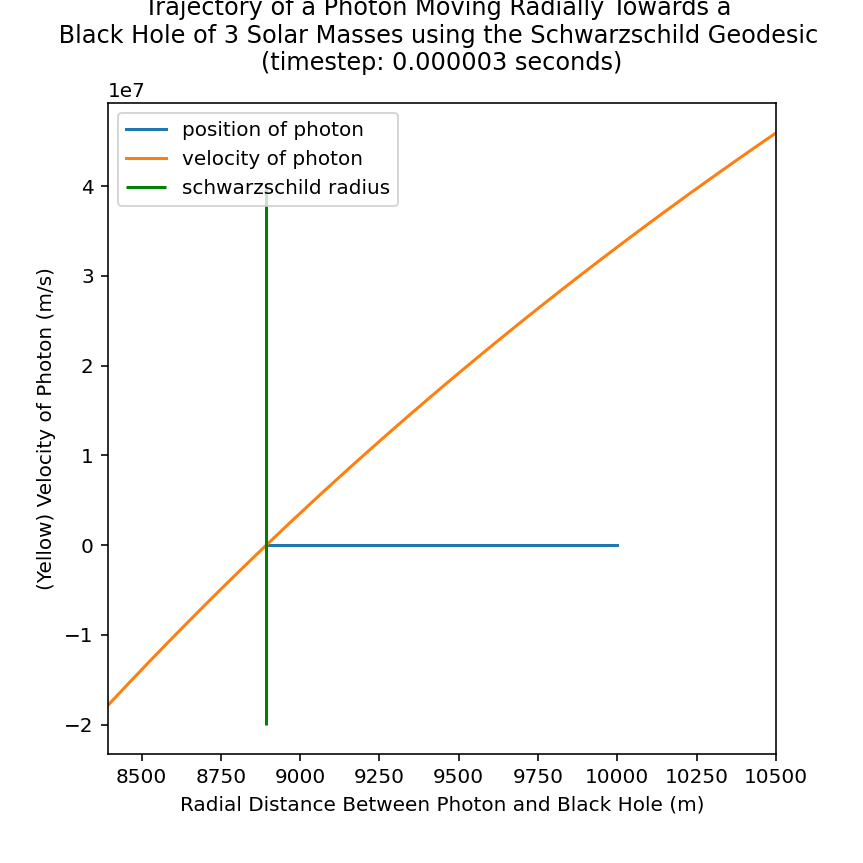

In [137]:
#plotting

fig, ax = plt.subplots()
fig.set_figheight(6)
ax.set_xlim(min(rlist) - 500, max(rlist) + 500)
animated_plot1, = ax.plot([],[], label="position of photon")

r = np.linspace(min(rlist) - 500, max(rlist) + 500,100)
velocity = c*(1-r_s/r)

ax.plot(r, velocity, label="velocity of photon")

ax.vlines(r_s, -2*10**7, 4*10**7, label = "schwarzschild radius", color="green")

ax.title.set_text('Trajectory of a Photon Moving Radially Towards a \n Black Hole of 3 Solar Masses using the Schwarzschild Geodesic  \n(timestep: 0.000003 seconds)')
ax.set_ylabel('(Yellow) Velocity of Photon (m/s)')
ax.set_xlabel("Radial Distance Between Photon and Black Hole (m)")
plt.legend()
plt.show()

#animation
def animate(frame):
    animated_plot1.set_data(rlist[:frame], yvals[:frame])
    return animated_plot1

ani = animation.FuncAnimation(fig = fig, func = animate, repeat=True,
                                    frames= len(rlist), interval=50)

## Photon trajectory in the orbital direction

In [138]:
def populate(currtheta, numthetas = 100, r = 10000):
    ''' given an initial theta value, populates a list of thetas describing the angular direction of a photon
        using the schwarzschild geodesic at distance from the black hole r. The length of the list is numthetas.
         The funciton returns the list as a numpy array'''
    returnlist = [currtheta]
    dtheta_dt = np.sqrt(1-r_s/r)*c/r
    print(dtheta_dt)
    delta_t = 0.000003
    for i in range(numthetas):
        newtheta = (currtheta + dtheta_dt*delta_t)
        returnlist.append(newtheta)
        currtheta = newtheta
    return np.array(returnlist)

def polartocartesian(listtheta, r):
    # returns two arrays: one describing the position in the x axis, and the other, the y axis. 
    # x[i] corresponds to y[i] for i in len(listtheta)
    x = r*np.cos(listtheta)
    y = r*np.sin(listtheta) 
    return np.array(x), np.array(y)

r = 20000 #feel free to change this

theta = 0 #to start
listtheta = populate(theta,300, r)
xpos, ypos = polartocartesian(listtheta, r)

11178.103595869916


In [139]:
#circle for the schwarzschild radius
x_s, y_s = polartocartesian(np.linspace(0,2*np.pi, 100), r_s)

<IPython.core.display.Javascript object>


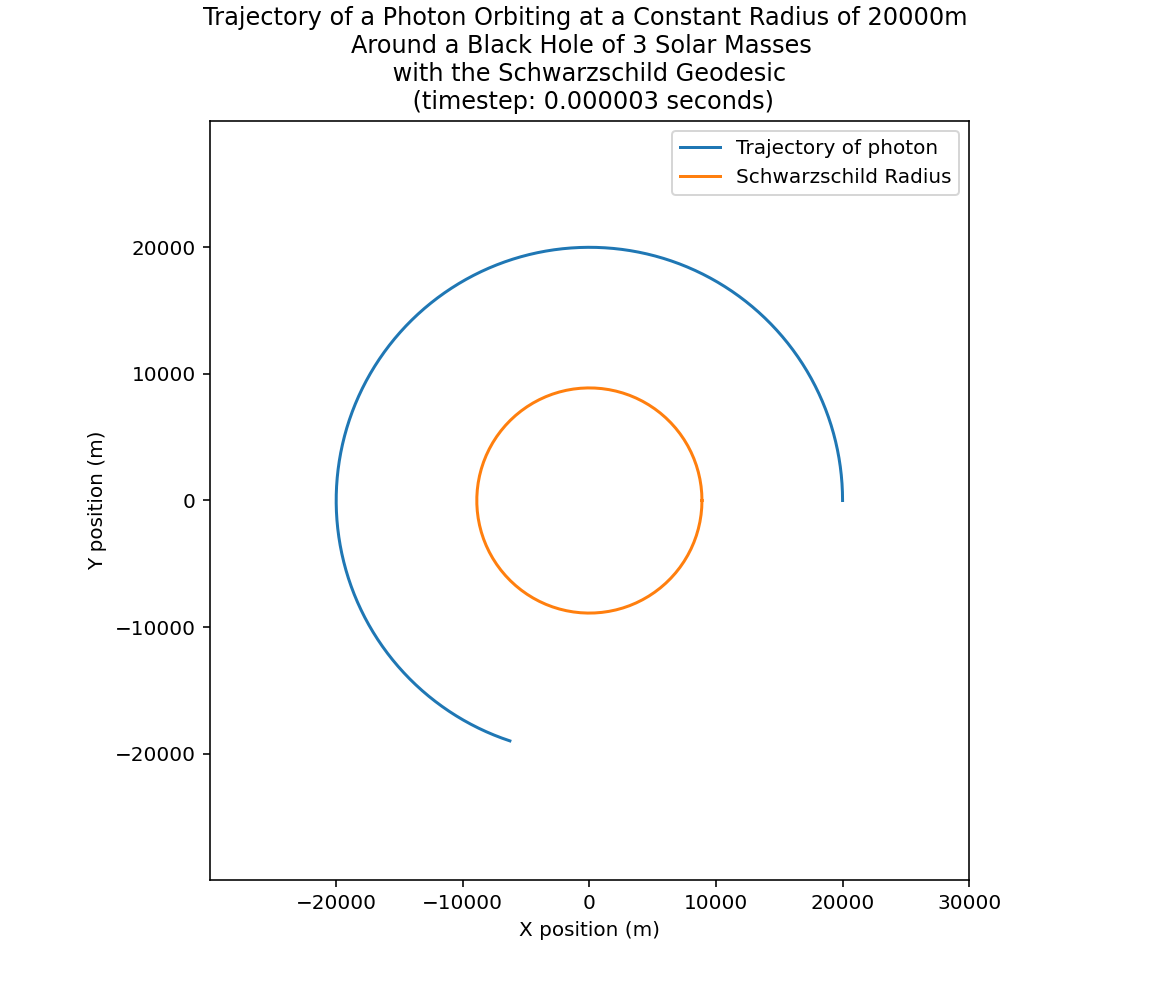

In [140]:
#plotting
fig1, ax1 = plt.subplots()
fig1.set_figheight(7)
fig1.set_figwidth(8)
ax1.set_xlim(min(xpos) - 10000, max(xpos) + 10000)
ax1.set_ylim(min(ypos) - 10000, max(ypos) + 10000)
ax1.set_aspect('equal', adjustable='box')
animated_plot2, = ax1.plot([],[], label="Trajectory of photon")

ax1.title.set_text('Trajectory of a Photon Orbiting at a Constant Radius of 20000m \nAround a Black Hole of 3 Solar Masses  \n with the Schwarzschild Geodesic \n (timestep: 0.000003 seconds)')
ax1.set_ylabel('Y position (m)')
ax1.set_xlabel("X position (m)")

ax1.plot(x_s, y_s, label="Schwarzschild Radius")

plt.legend()
plt.show()

#animation
def animate2(frame):
    animated_plot2.set_data(xpos[:frame], ypos[:frame])
    return animated_plot2
ani = animation.FuncAnimation(fig = fig, func = animate2, repeat=True,
                                    frames= len(ypos), interval=50)

